In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('df.csv',encoding='cp949')
df_gh = pd.read_csv('df_gh.csv',encoding='cp949')
df_gn = pd.read_csv('df_gn.csv',encoding='cp949')
df_hn = pd.read_csv('df_hn.csv',encoding='cp949')
df_gold = pd.read_csv('df_gold.csv',encoding='cp949')
df_han = pd.read_csv('df_han.csv',encoding='cp949')
df_nakdong = pd.read_csv('df_nakdong.csv',encoding='cp949')
df_list=[df, df_gh, df_gn, df_hn, df_gold, df_han, df_nakdong]
df_name_li=['df','df_gh','df_gn','df_hn','df_gold','df_han','df_nakdong']
for df in df_list:
    df['date']=pd.to_datetime(df['date'])
    df.drop('cells', axis='columns',inplace=True)
    df["datetime-day"] = df["date"].dt.day
    df.drop(columns='date', inplace=True)

In [13]:
for i in df_list:
    jli=list(i.iloc[:,5:])
    for j in jli:
        i[j]=i.groupby("month").transform(lambda x: x.fillna(x.mean()))[j]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

a=0
for df in df_list:
#train, test 분리
    X = df.drop(["log_cells"], axis=1)
    y = df[['log_cells']]
    b=df_name_li[a]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #20%만 테스트데이터로
    model = RandomForestRegressor(n_estimators=200 ,max_depth = 32)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_sq = model.score(X_train, y_train)  #학습데이터로 모델 평가==학습잘되었나 보는것
    test_accuracy= model.score(X_test, y_test)
    print(b,"예측 정확도:", test_accuracy)
    RMSE = np.sqrt(mean_squared_error(y_pred , y_test))
    print(b,"RMSE:", RMSE)
    a=a+1
    
#연속형 변수 스케일링
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df 예측 정확도: 0.7549065182007192
df RMSE: 1.6301800650093292


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_gh 예측 정확도: 0.6488586474941173
df_gh RMSE: 1.5716644176225814


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_gn 예측 정확도: 0.7371222653898626
df_gn RMSE: 1.8130288815784026


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_hn 예측 정확도: 0.8028634953876119
df_hn RMSE: 1.4865531358269226


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_gold 예측 정확도: 0.6996462713178229
df_gold RMSE: 1.790228348009612


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_han 예측 정확도: 0.5396211897285965
df_han RMSE: 1.3200240160611663


C:\Users\User\AppData\Local\Temp/ipykernel_6488/2687285975.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


df_nakdong 예측 정확도: 0.7382418359522261
df_nakdong RMSE: 1.7217001243291292


In [52]:
import xgboost
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
a=0
for df in df_list:
#train, test 분리
    X = df.drop(["log_cells"], axis=1)
    y = df[['log_cells']]
    b=df_name_li[a]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    xgb_model.fit(X_train,y_train)
    r_sq = xgb_model.score(X_train, y_train)
    print(b, "예측 정확도:", r_sq)
    y_pred = xgb_model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred , y_test))
    print(b,"RMSE:", explained_variance_score(y_pred,y_test))
    print('---------------------------------------------------------------------')
    a= a+1

df 예측 정확도: 0.8746106613584177
df RMSE: 0.6290860143097953
---------------------------------------------------------------------
df_gh 예측 정확도: 0.8916597969294153
df_gh RMSE: 0.47505619995783954
---------------------------------------------------------------------
df_gn 예측 정확도: 0.9107746903047454
df_gn RMSE: 0.6432238489118957
---------------------------------------------------------------------
df_hn 예측 정확도: 0.9314107067944826
df_hn RMSE: 0.751610754758534
---------------------------------------------------------------------
df_gold 예측 정확도: 0.9455009552739915
df_gold RMSE: 0.581256892192161
---------------------------------------------------------------------
df_han 예측 정확도: 0.9417200206730812
df_han RMSE: 0.1865937546748896
---------------------------------------------------------------------
df_nakdong 예측 정확도: 0.946416267281786
df_nakdong RMSE: 0.6726125633522273
---------------------------------------------------------------------


In [18]:
from sklearn.ensemble import RandomForestRegressor # 회귀트리(모델)
model = RandomForestRegressor(n_estimators=100 ,max_depth = 12)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=12)

In [19]:
r_sq = model.score(X_train, y_train)  #학습데이터로 모델 평가==학습잘되었나 보는것
print(r_sq)

0.9382158572214385


평가지표

In [21]:
test_accuracy= model.score(X_test, y_test)
print(test_accuracy)   #test데이터로 정확도(예측력)

0.8053873419561883


In [22]:
y_pred = model.predict(X_test)

하이퍼 파라미터 튜닝

In [17]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV( model , param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7705


In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
mse = mean_squared_error(y_pred , y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred , y_test)
RMSLE = np.sqrt(mean_squared_log_error(y_pred , y_test))
print(mse)
print(rmse)
print(r2)
print(RMSLE)

2.3677640410064082
1.538754054748974
0.742282229519351
0.5393496960405919


In [65]:
from sklearn.tree import export_graphviz
from graphviz import Source
estimator = model.estimators_[80]

export_graphviz(estimator, out_file='model.dot', 
                feature_names = X.columns,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

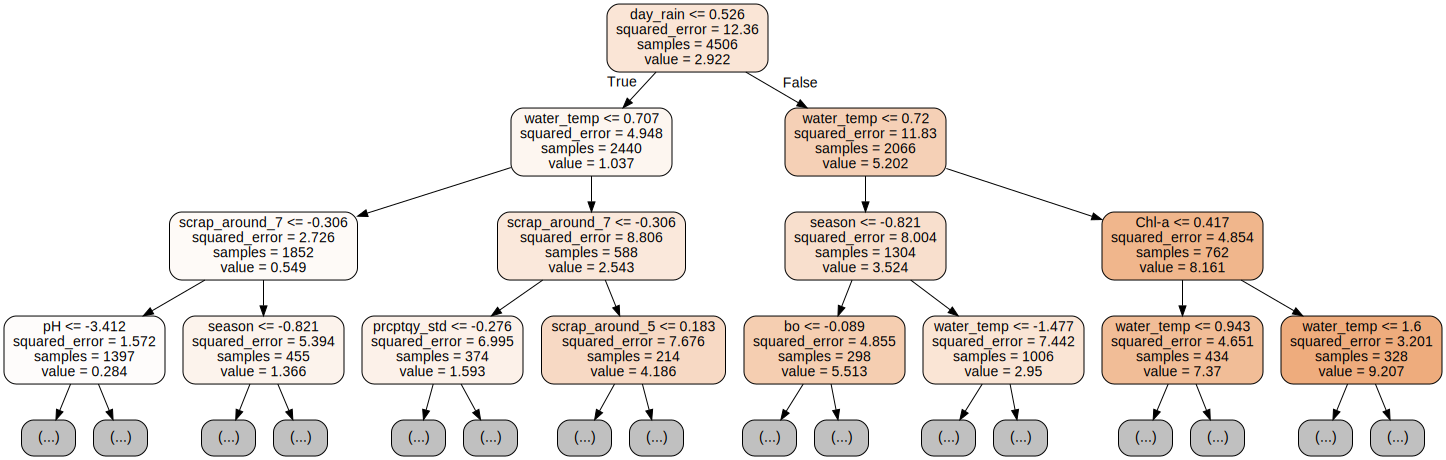

In [66]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("/content/model.dot") as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

In [50]:
src.view()

'Source.gv.pdf'

([<matplotlib.axis.YTick at 0x7ff405f13a10>,
 [Text(0, 0, 'region'),
  Text(0, 0, 'month'),
  Text(0, 0, 'season'),
  Text(0, 0, 'water_temp'),
  Text(0, 0, 'pH'),
  Text(0, 0, 'DO'),
  Text(0, 0, 'Chl-a'),
  Text(0, 0, 'scrap_around_3'),
  Text(0, 0, 'scrap_around_5'),
  Text(0, 0, 'scrap_around_7'),
  Text(0, 0, 'scrap_around_10'),
  Text(0, 0, 'fac_3'),
  Text(0, 0, 'fac_5'),
  Text(0, 0, 'fac_7'),
  Text(0, 0, 'fac_10'),
  Text(0, 0, 'av_temp'),
  Text(0, 0, 'day_rain'),
  Text(0, 0, 'av_windspeed'),
  Text(0, 0, 'bo'),
  Text(0, 0, 'inflowqy_std'),
  Text(0, 0, 'lowlevel_std'),
  Text(0, 0, 'prcptqy_std'),
  Text(0, 0, 'rsvwtrt_std'),
  Text(0, 0, 'totdcwtrqy_std')])

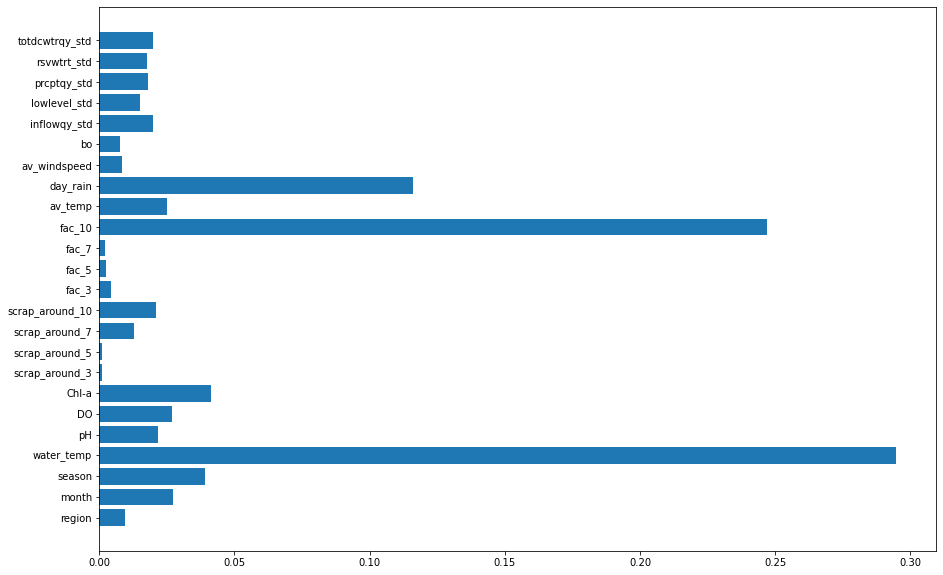

In [ ]:
fig , ax = plt.subplots(figsize = (15,10))
imp = model.feature_importances_
plt.barh(range(len(imp)), imp)        # 변수 중요도
plt.yticks( range(len(imp)) , X.columns ) 